Choose a classification dataset (e.g., Iris, Breast Cancer). Implement data
preprocessing (cleaning, scaling, encoding), train models (Logistic Regression,
Decision Trees, KNN, SVM, ANN), and Evaluate models using confusion matrix,
accuracy, precision, recall, F1-score, etc. and ROC curves. Identify the best-performing
model.

1. Imports and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

# --- Preprocessing ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# --- Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# --- Evaluation ---
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# Filter convergence warnings from MLPClassifier
filterwarnings('ignore', category=UserWarning)
filterwarnings('ignore', category=FutureWarning)

# --- 1. Load Data ---
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# target 0 = malignant, 1 = benign
y = pd.Series(cancer.target, name='Target') 

# Display data info
print("--- Data Head (X) ---")
print(X.head())
print("\n--- Target Distribution ---")
print(y.value_counts(normalize=True))

# --- 2. Data Preprocessing (Cleaning, Encoding, Scaling) ---

# Cleaning: This dataset is clean, with no missing values.
# print(X.info()) # .info() would confirm no nulls

# Encoding: All features are numeric, so no categorical encoding is needed.

# Train-Test Split: This is the most crucial first step.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set: {X_train.shape}")
print(f"Testing set:  {X_test.shape}")

# Scaling: We will apply StandardScaler. This is CRITICAL for
# Logistic Regression, KNN, SVM, and ANN. We'll build this into a 
# Pipeline for each model to prevent data leakage.

--- Data Head (X) ---
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst per

2. Model Training and Evaluation


Training Logistic Regression...

--- Confusion Matrix ---


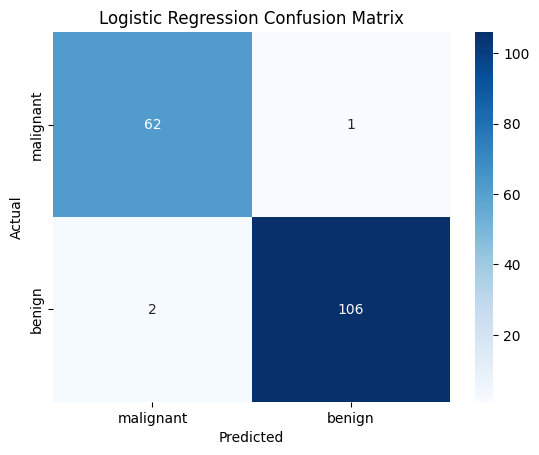


--- Classification Report ---
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Training Decision Tree...

--- Confusion Matrix ---


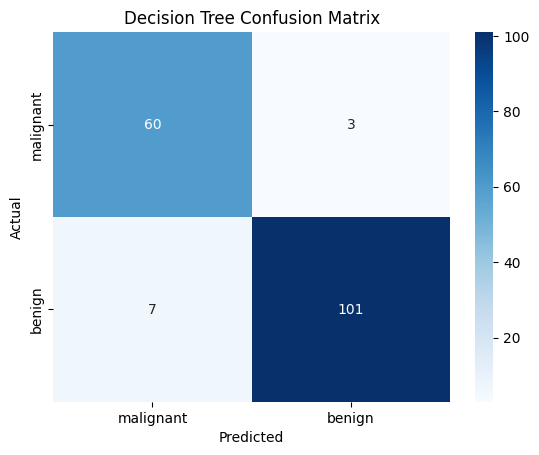


--- Classification Report ---
              precision    recall  f1-score   support

   malignant       0.90      0.95      0.92        63
      benign       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171


Training K-Nearest Neighbors (KNN)...

--- Confusion Matrix ---


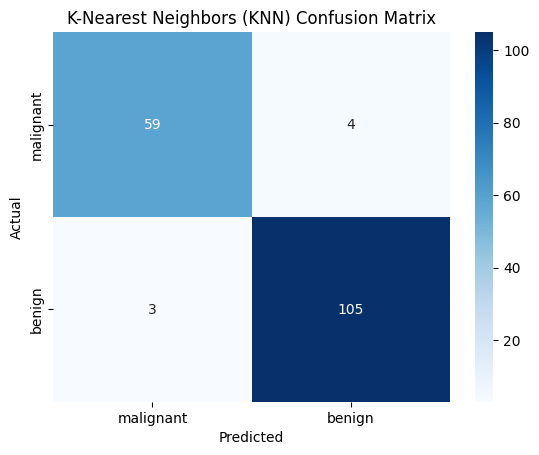


--- Classification Report ---
              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Training Support Vector Machine (SVM)...

--- Confusion Matrix ---


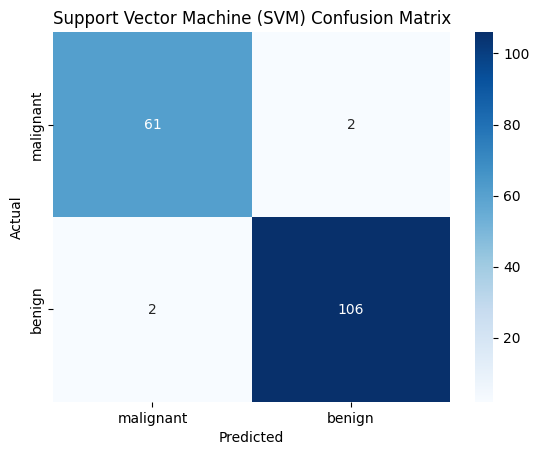


--- Classification Report ---
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Training Artificial Neural Network (ANN)...

--- Confusion Matrix ---


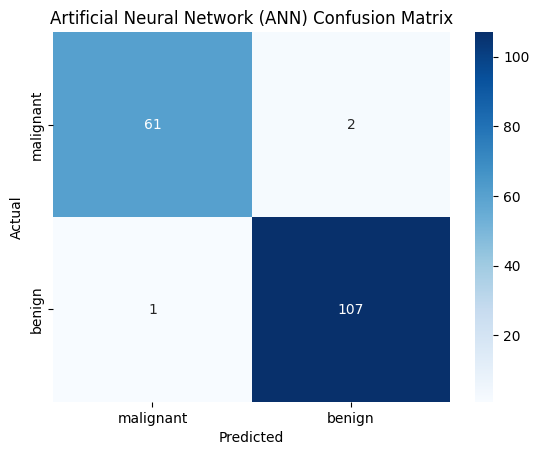


--- Classification Report ---
              precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        63
      benign       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [2]:
# --- 3. Define Model Pipelines ---

# We set probability=True for SVM to get probabilities for the ROC curve
# We set max_iter=1000 for ANN (MLPClassifier) to ensure convergence
models = {
    'Logistic Regression': Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(random_state=42))
    ]),
    
    'Decision Tree': Pipeline(steps=[
        # Scaling isn't required for trees, but we include it for consistency
        ('scaler', StandardScaler()),
        ('model', DecisionTreeClassifier(random_state=42))
    ]),
    
    'K-Nearest Neighbors (KNN)': Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    
    'Support Vector Machine (SVM)': Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', SVC(random_state=42, probability=True))
    ]),
    
    'Artificial Neural Network (ANN)': Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
    ])
}

# --- 4. Train and Evaluate Models ---

# We'll store results here to compare later
model_results = []
roc_curves = {}

for name, pipeline in models.items():
    print(f"\n" + "="*30)
    print(f"Training {name}...")
    print("="*30)
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Get predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] # Probabilities for 'Benign' (1)
    
    # --- Confusion Matrix ---
    print("\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=cancer.target_names, 
                yticklabels=cancer.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    
    # --- Classification Report ---
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=cancer.target_names))
    
    # --- Scalar Metrics ---
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    # --- ROC Curve Data ---
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    
    # Store results
    model_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': roc_auc
    })

3. ROC (Receiver Operating Characteristic) Curve Comparison

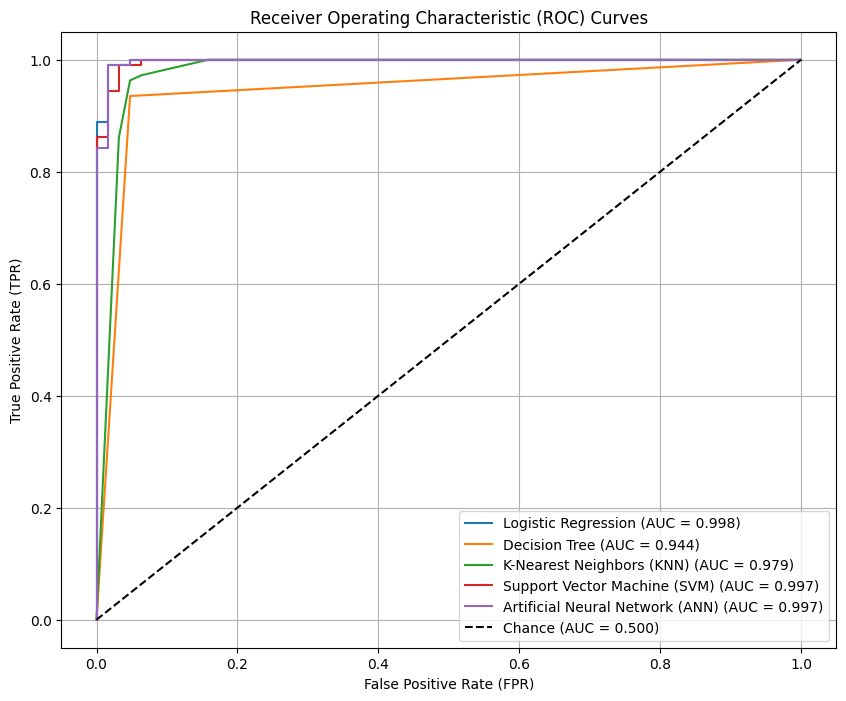

In [3]:
# --- 5. Plot All ROC Curves ---
plt.figure(figsize=(10, 8))

for name, data in roc_curves.items():
    plt.plot(data['fpr'], data['tpr'], 
             label=f"{name} (AUC = {data['auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.500)') # 50/50 line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.show()

4. Final Model Comparison and Selection

In [4]:
# --- 6. Final Results Comparison ---
results_df = pd.DataFrame(model_results).set_index('Model')
results_df = results_df.sort_values(by='F1-Score', ascending=False)

print("\n" + "="*50)
print("--- Final Model Performance Comparison ---")
print("="*50)
print(results_df.round(4))


--- Final Model Performance Comparison ---
                                 Accuracy  Precision  Recall  F1-Score     AUC
Model                                                                         
Artificial Neural Network (ANN)    0.9825     0.9817  0.9907    0.9862  0.9972
Logistic Regression                0.9825     0.9907  0.9815    0.9860  0.9979
Support Vector Machine (SVM)       0.9766     0.9815  0.9815    0.9815  0.9966
K-Nearest Neighbors (KNN)          0.9591     0.9633  0.9722    0.9677  0.9787
Decision Tree                      0.9415     0.9712  0.9352    0.9528  0.9438
